In [5]:
import os
import cv2
import random
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping

from tqdm import tqdm

In [6]:
DATA_DIR = '../input/cat-and-dog'
TRAIN_DATADIR = os.path.join(DATA_DIR, 'training_set')
TEST_DATADIR = os.path.join(DATA_DIR, 'test_set')
print(TRAIN_DATADIR)

![](http://)![](http://)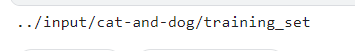

In [7]:
train_dir = os.path.join(TRAIN_DATADIR, 'training_set')
test_dir = os.path.join(TEST_DATADIR, 'test_set')

In [8]:
CATEGORIES = []
for c in os.listdir(train_dir): 
  CATEGORIES.append(c)
print(CATEGORIES)

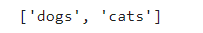

In [9]:
train_data = []
test_data = []
IMG_SIZE = 200

In [10]:
for c in CATEGORIES:  
  path = os.path.join(train_dir, c) 
  class_num = CATEGORIES.index(c) 
  for img in tqdm(os.listdir(path)):
    try:
        img_arr = cv2.imread(os.path.join(path, img)) 
        img_resized = cv2.resize(img_arr, (IMG_SIZE, IMG_SIZE)) 
        train_data.append([img_resized, class_num])
    except Exception as e:
        pass

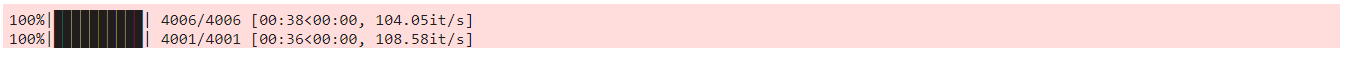

In [11]:
print(len(train_data))

In [12]:
for c in CATEGORIES:  
  path = os.path.join(test_dir, c) 
  class_num = CATEGORIES.index(c) 
  for img in tqdm(os.listdir(path)):
    try:
        img_arr = cv2.imread(os.path.join(path, img)) 
        img_resized = cv2.resize(img_arr, (IMG_SIZE, IMG_SIZE))
        test_data.append([img_resized, class_num])
    except Exception as e: 
        pass

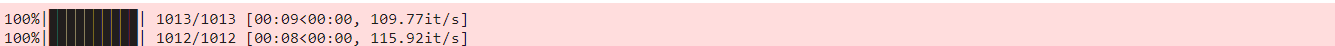

In [13]:
print(len(test_data))

In [14]:
X_train = []
Y_train = []
for img,label in train_data: 
  X_train.append(img)
  Y_train.append(label)


X_train = np.array(X_train).astype('float32').reshape(-1, IMG_SIZE, IMG_SIZE,  3)
Y_train = np.array(Y_train)

print(X_train.shape, Y_train.shape)

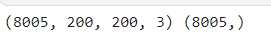

In [15]:
X_test = []
Y_test = []
for img,label in test_data: 
  X_test.append(img)
  Y_test.append(label)


X_test = np.array(X_test).astype('float32').reshape(-1, IMG_SIZE, IMG_SIZE,  3)
Y_test = np.array(Y_test)

print(X_test.shape, Y_test.shape)

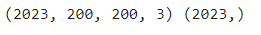

In [16]:
mean_img = np.mean(X_train, axis=0) 


In [17]:

mean_rgb = np.mean(X_train, axis=(0,1,2))
print(mean_rgb)

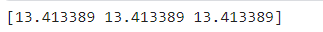

In [18]:
X_train_norm = np.empty_like(X_train)
X_test_norm = np.empty_like(X_test)

In [19]:
for i in range(len(X_train)): 
    for c in range(3):       
        if(c==1):
            X_train_norm[i,:, :, c] = X_train[i,:, :, c] - mean_rgb[0]
        elif(c==2):
            X_train_norm[i,:, :, c] = X_train[i,:, :, c] - mean_rgb[1]
        else:
            X_train_norm[i,:, :, c] = X_train[i,:, :, c] - mean_rgb[2]
            
for i in range(len(X_test)):
    for c in range(3):
        if(c==1):
            X_test_norm[i,:, :, c] = X_test[i,:, :, c] - mean_rgb[0]
        elif(c==2):
            X_test_norm[i,:, :, c] = X_test[i,:, :, c] - mean_rgb[1]
        else:
            X_test_norm[i,:, :, c] = X_test[i,:, :, c] - mean_rgb[2]

In [20]:
c = 0
plt.figure(figsize=(5,10))
for i in range(5):
    plt.subplot(5,2,c+1)
    plt.imshow(X_train[i].astype('uint8'))
    plt.xticks([])
    plt.yticks([])
    
    plt.subplot(5,2,c+2)
    plt.imshow(X_train_norm[i].astype('uint8'))
    plt.xticks([])
    plt.yticks([])

    c += 2
    
plt.tight_layout()
plt.show()

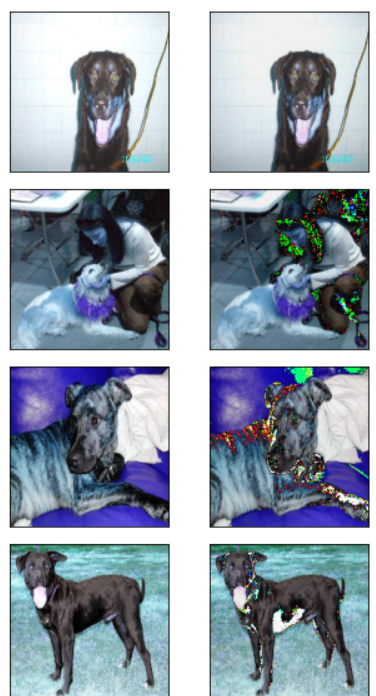

In [21]:
model = keras.Sequential([
    keras.Input(shape=X_train_norm.shape[1:]),
    
    layers.Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding='same'),
    layers.Activation('relu'),
    layers.Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding='same'),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
    
    
    layers.Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), padding='same'),
    layers.Activation('relu'),
    layers.Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), padding='same'),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
    
    layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'),
    layers.Activation('relu'),
    layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'),
    layers.Activation('relu'),
    layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
    
    
    layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'),
    layers.Activation('relu'),
    layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'),
    layers.Activation('relu'),
    layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
    
    
    layers.Flatten(),
    
    layers.Dense(units=4096),
    layers.Activation('relu'),
    layers.Dropout(0.5),
    
    layers.Dense(units=4096),
    layers.Activation('relu'),
    layers.Dropout(0.5),

    layers.Dense(10),
    layers.Activation('softmax')
])

model.summary()

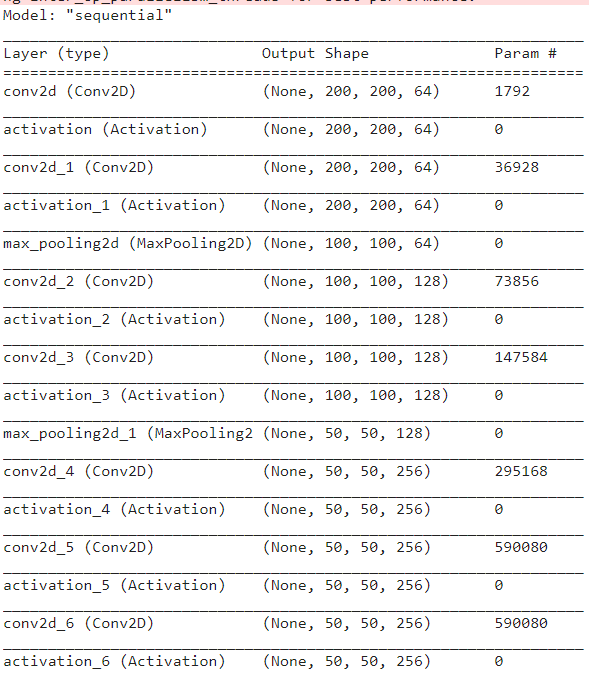
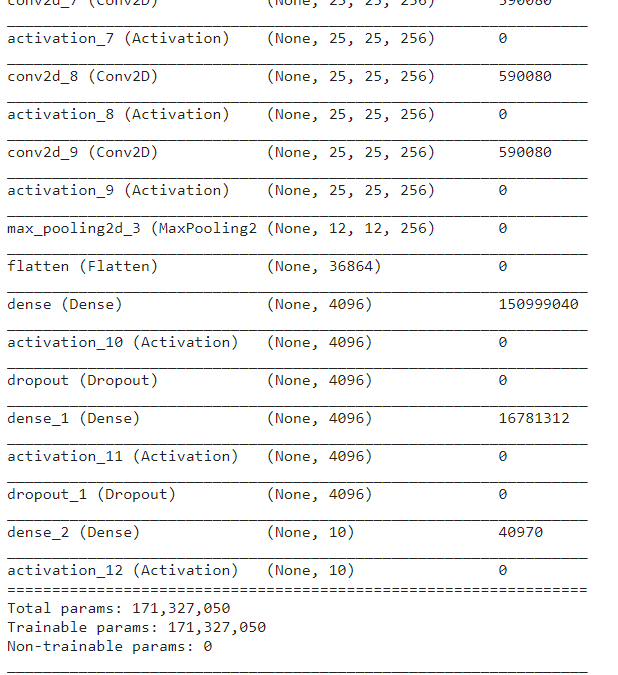

In [22]:
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.0001), 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [ ]:
cb = EarlyStopping(monitor='val_loss', min_delta=0.02, patience=3, restore_best_weights=True)
#Monitoring the validation loss
h = model.fit(x=X_train_norm, y=Y_train, 
              epochs=20, 
              validation_split=0.2,
              batch_size=512,
              callbacks=[cb]
             )